In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Paris_Hotel-Room.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0        id                            listing_url  \
0           967         967    914070    https://www.airbnb.com/rooms/914070   
1          3784        3784   4132978   https://www.airbnb.com/rooms/4132978   
2          8808        8808   9763149   https://www.airbnb.com/rooms/9763149   
3          8809        8809   9763165   https://www.airbnb.com/rooms/9763165   
4         10544       10544  12446756  https://www.airbnb.com/rooms/12446756   

  last_scraped                                        description   host_id  \
0   2024-09-11                                                NaN   3980291   
1   2024-09-11  Amazing apartment with a location right in the...   7608379   
2   2024-09-06  Ideally located near mythical places: Montmart...  50342512   
3   2024-09-11  Ideally located near the mythical attractions ...  50342512   
4   2024-09-13  This lovely room has a queen size bed ( high q...  42576723   

                                     host_url  host_since  host_response_time  \
0   https://www.airbnb.com/users/show/3980291  2012-10-26      within an hour   
1   https://www.airbnb.com/users/show/7608379  2013-07-20      within an hour   
2  https://www.airbnb.com/users/show/50342512  2015-12-02      within an hour   
3  https://www.airbnb.com/users/show/50342512  2015-12-02      within an hour   
4  https://www.airbnb.com/users/show/42576723  2015-08-26  within a few hours   

   ... review_scores_checkin review_scores_communication  \
0  ...                  4.95                        4.97   
1  ...                  4.69                        4.67   
2  ...                  4.50                        4.83   
3  ...                  4.79                        4.80   
4  ...                  4.86                        4.64   

  review_scores_location                      license  instant_bookable  \
0                   4.96  Exempt - hotel-type listing                 t   
1                   4.94  Exempt - hotel-type listing                 t   
2                   4.17                7510402838018                 f   
3                   4.26                7510402838018                 f   
4                   4.62                7510402838018                 t   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           0   
1                             34                                          27   
2                              6                                           0   
3                              6                                           0   
4                              4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            4   
3                                            4   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.93  
1                                           0              0.81  
2                                           0              0.06  
3                                           0              0.19  
4                                           0              0.44  

[5 rows x 52 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

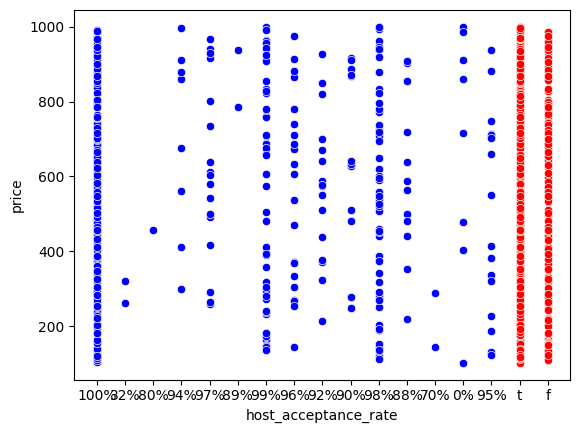

In [3]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [4]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
type(model)

sklearn.linear_model._base.LinearRegression

In [7]:
# Identificar columnas que contienen valores en formato de porcentaje
percentage_columns = [col for col in df.select_dtypes(include=['object']).columns 
                      if df[col].astype(str).str.contains('%').any()]

# Convertir valores de porcentaje a decimal
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '', regex=True)  # Eliminar '%'
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100  # Convertir a número en decimal

# Verificar que la conversión fue exitosa
print("Columnas convertidas a decimal:", percentage_columns)
print(df[percentage_columns].head())  # Muestra los primeros valores convertidos

Columnas convertidas a decimal: ['description', 'host_response_rate', 'host_acceptance_rate']
   description  host_response_rate  host_acceptance_rate
0          NaN                 1.0                  1.00
1          NaN                 1.0                  1.00
2          NaN                 NaN                  1.00
3          NaN                 NaN                  1.00
4          NaN                 1.0                  0.32


In [16]:
# Reemplazar 'Entire home/apt' por el número 1 en todas las columnas donde aparezca
df = df.replace('Hotel Room', 4)

# Verificar si el reemplazo fue exitoso
print(df.head())

   Unnamed: 0.1  Unnamed: 0        id                            listing_url  \
0           967         967    914070    https://www.airbnb.com/rooms/914070   
1          3784        3784   4132978   https://www.airbnb.com/rooms/4132978   
2          8808        8808   9763149   https://www.airbnb.com/rooms/9763149   
3          8809        8809   9763165   https://www.airbnb.com/rooms/9763165   
4         10544       10544  12446756  https://www.airbnb.com/rooms/12446756   

  last_scraped  description   host_id  \
0   2024-09-11          0.0   3980291   
1   2024-09-11          0.0   7608379   
2   2024-09-06          0.0  50342512   
3   2024-09-11          0.0  50342512   
4   2024-09-13          0.0  42576723   

                                     host_url  host_since  host_response_time  \
0   https://www.airbnb.com/users/show/3980291  2012-10-26      within an hour   
1   https://www.airbnb.com/users/show/7608379  2013-07-20      within an hour   
2  https://www.airbnb.com/use

In [17]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN



float64
0


In [18]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [19]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([13402564.58539383]),
 'rank_': 1,
 'singular_': array([1.27455548e-05]),
 'intercept_': np.float64(548.483979535816)}

In [20]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0005933857184929892

In [21]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([561.88654412, 561.88654412, 561.88654412, 561.88654412,
       552.7728002 , 561.88654412, 561.88654412, 561.88654412,
       559.2060312 , 561.88654412, 561.88654412, 561.88654412,
       561.88654412, 561.08239025, 561.08239025, 548.48397954,
       552.7728002 , 561.88654412, 548.48397954, 561.48446718,
       548.48397954, 561.88654412, 561.48446718, 561.88654412,
       548.48397954, 561.88654412, 561.88654412, 561.88654412,
       561.88654412, 561.88654412, 561.88654412, 548.48397954,
       560.41226202, 561.88654412, 561.88654412, 561.88654412,
       561.88654412, 561.88654412, 561.88654412, 561.75251848,
       561.88654412, 561.88654412, 561.88654412, 561.88654412,
       561.88654412, 561.88654412, 561.88654412, 561.88654412,
       561.88654412, 561.35044154, 561.88654412, 561.88654412,
       560.81433895, 561.88654412, 561.35044154, 561.88654412,
       561.88654412, 560.54628766, 561.08239025, 548.48397954,
       561.35044154, 548.48397954, 561.35044154, 561.88

In [22]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0                   id  \
0      561.886544           967         967               914070   
1      561.886544          3784        3784              4132978   
2      561.886544          8808        8808              9763149   
3      561.886544          8809        8809              9763165   
4      552.772800         10544       10544             12446756   
..            ...           ...         ...                  ...   
747    561.886544         30594       30594             43130673   
748    561.886544         40250       40250   636051848763827734   
749    561.886544         40252       40252   636055334530673704   
750    561.886544         74941       74941  1102633733451200281   
751    561.886544         74942       74942  1102635361130445895   

                                          listing_url last_scraped  \
0                 https://www.airbnb.com/rooms/914070   2024-09-11   
1                https://www.airbnb.com/rooms/4132978   2024-09-11   
2                https://www.airbnb.com/rooms/9763149   2024-09-06   
3                https://www.airbnb.com/rooms/9763165   2024-09-11   
4               https://www.airbnb.com/rooms/12446756   2024-09-13   
..                                                ...          ...   
747             https://www.airbnb.com/rooms/43130673   2024-09-10   
748   https://www.airbnb.com/rooms/636051848763827734   2024-09-13   
749   https://www.airbnb.com/rooms/636055334530673704   2024-09-11   
750  https://www.airbnb.com/rooms/1102633733451200281   2024-09-13   
751  https://www.airbnb.com/rooms/1102635361130445895   2024-09-13   

     description    host_id                                     host_url  \
0            0.0    3980291    https://www.airbnb.com/users/show/3980291   
1            0.0    7608379    https://www.airbnb.com/users/show/7608379   
2            0.0   50342512   https://www.airbnb.com/users/show/50342512   
3            0.0   50342512   https://www.airbnb.com/users/show/50342512   
4            0.0   42576723   https://www.airbnb.com/users/show/42576723   
..           ...        ...                                          ...   
747          0.0  183855130  https://www.airbnb.com/users/show/183855130   
748          0.0  458723902  https://www.airbnb.com/users/show/458723902   
749          0.0  458723902  https://www.airbnb.com/users/show/458723902   
750          0.0  245844815  https://www.airbnb.com/users/show/245844815   
751          0.0  245844815  https://www.airbnb.com/users/show/245844815   

     host_since  ... review_scores_checkin  review_scores_communication  \
0    2012-10-26  ...                  4.95                         4.97   
1    2013-07-20  ...                  4.69                         4.67   
2    2015-12-02  ...                  4.50                         4.83   
3    2015-12-02  ...                  4.79                         4.80   
4    2015-08-26  ...                  4.86                         4.64   
..          ...  ...                   ...                          ...   
747  2018-04-12  ...                  4.80                         4.83   
748  2022-05-12  ...                  4.44                         4.22   
749  2022-05-12  ...                  4.68                         4.52   
750  2019-02-27  ...                  5.00                         5.00   
751  2019-02-27  ...                  4.80                         4.83   

     review_scores_location                      license  instant_bookable  \
0                      4.96  Exempt - hotel-type listing                 t   
1                      4.94  Exempt - hotel-type listing                 t   
2                      4.17                7510402838018                 f   
3                      4.26                7510402838018                 f   
4                      4.62                7510402838018                 t   
..                      ...                          ...         

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

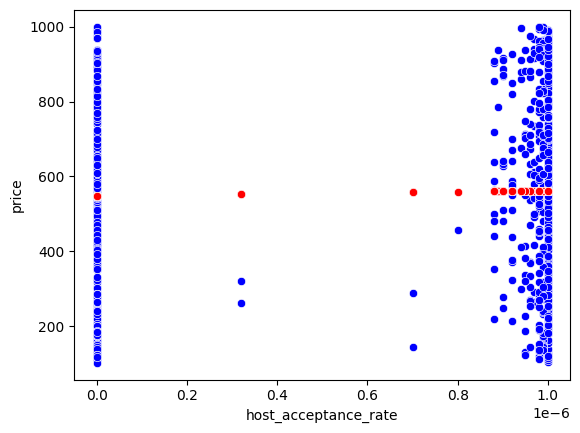

In [23]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

In [24]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0005933857184929892

In [25]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.024359509816352817)

In [26]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_25604\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [27]:
df['room_type'] = 4

In [28]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

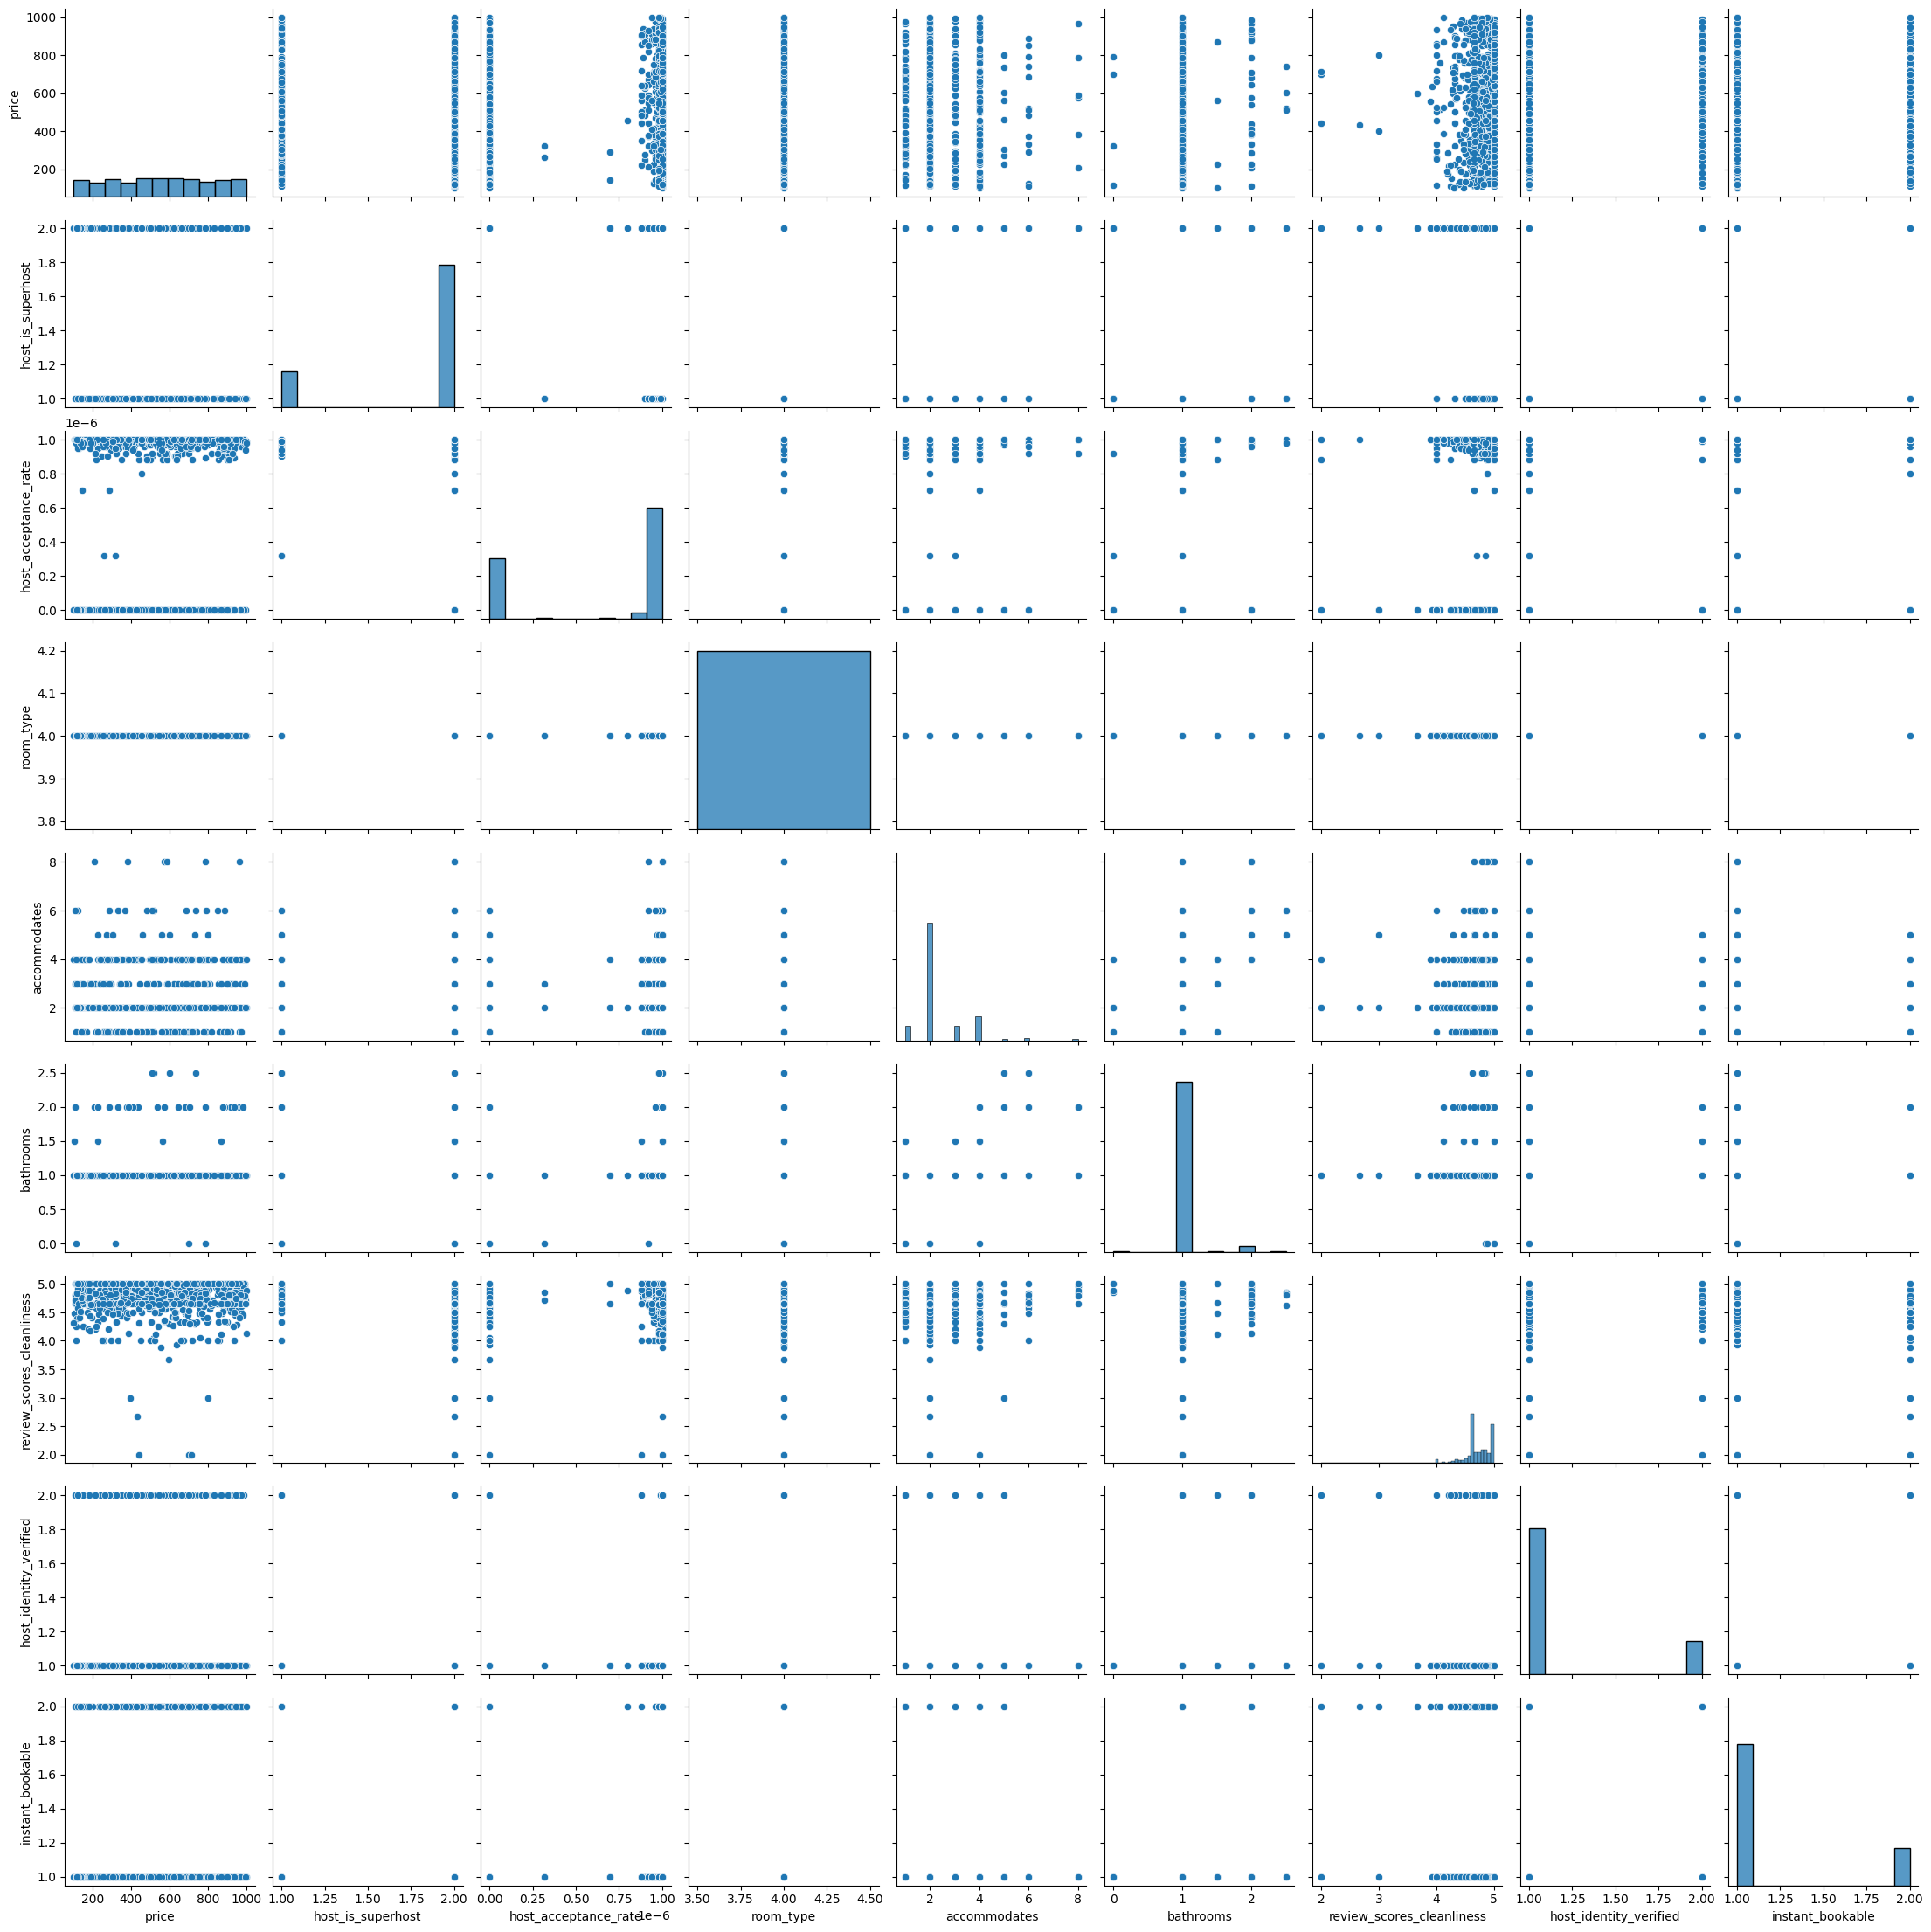

In [29]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [30]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000          -0.025272              0.024360   
host_is_superhost         -0.025272           1.000000             -0.343325   
host_acceptance_rate       0.024360          -0.343325              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates              -0.018347           0.057030              0.062018   
bathrooms                  0.015913          -0.012553              0.107774   
review_scores_cleanliness -0.023349          -0.164738              0.028655   
host_identity_verified     0.004877           0.197022             -0.407078   
instant_bookable          -0.020650           0.153918             -0.352401   

                           room_type  accommodates  bathrooms  \
price                            NaN     -0.018347   0.015913   
host_is_superhost                NaN      0.057030  -0.012553   
host_acceptance_rate             NaN      0.062018   0.107774   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.473507   
bathrooms                        NaN      0.473507   1.000000   
review_scores_cleanliness        NaN     -0.026041  -0.009654   
host_identity_verified           NaN     -0.069784  -0.041346   
instant_bookable                 NaN     -0.096593  -0.042450   

                           review_scores_cleanliness  host_identity_verified  \
price                                      -0.023349                0.004877   
host_is_superhost                          -0.164738                0.197022   
host_acceptance_rate                        0.028655               -0.407078   
room_type                                        NaN                     NaN   
accommodates                               -0.026041               -0.069784   
bathrooms                                  -0.009654               -0.041346   
review_scores_cleanliness                   1.000000               -0.021960   
host_identity_verified                     -0.021960                1.000000   
instant_bookable                           -0.102430                0.662610   

                           instant_bookable  
price                             -0.020650  
host_is_superhost                  0.153918  
host_acceptance_rate              -0.352401  
room_type                               NaN  
accommodates                      -0.096593  
bathrooms                         -0.042450  
review_scores_cleanliness         -0.102430  
host_identity_verified             0.662610  
instant_bookable                   1.000000

In [31]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.025272              0.024360   
host_is_superhost          0.025272           1.000000              0.343325   
host_acceptance_rate       0.024360           0.343325              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.018347           0.057030              0.062018   
bathrooms                  0.015913           0.012553              0.107774   
review_scores_cleanliness  0.023349           0.164738              0.028655   
host_identity_verified     0.004877           0.197022              0.407078   
instant_bookable           0.020650           0.153918              0.352401   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.018347   0.015913   
host_is_superhost                NaN      0.057030   0.012553   
host_acceptance_rate             NaN      0.062018   0.107774   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.473507   
bathrooms                        NaN      0.473507   1.000000   
review_scores_cleanliness        NaN      0.026041   0.009654   
host_identity_verified           NaN      0.069784   0.041346   
instant_bookable                 NaN      0.096593   0.042450   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.023349                0.004877   
host_is_superhost                           0.164738                0.197022   
host_acceptance_rate                        0.028655                0.407078   
room_type                                        NaN                     NaN   
accommodates                                0.026041                0.069784   
bathrooms                                   0.009654                0.041346   
review_scores_cleanliness                   1.000000                0.021960   
host_identity_verified                      0.021960                1.000000   
instant_bookable                            0.102430                0.662610   

                           instant_bookable  
price                              0.020650  
host_is_superhost                  0.153918  
host_acceptance_rate               0.352401  
room_type                               NaN  
accommodates                       0.096593  
bathrooms                          0.042450  
review_scores_cleanliness          0.102430  
host_identity_verified             0.662610  
instant_bookable                   1.000000

<Axes: >

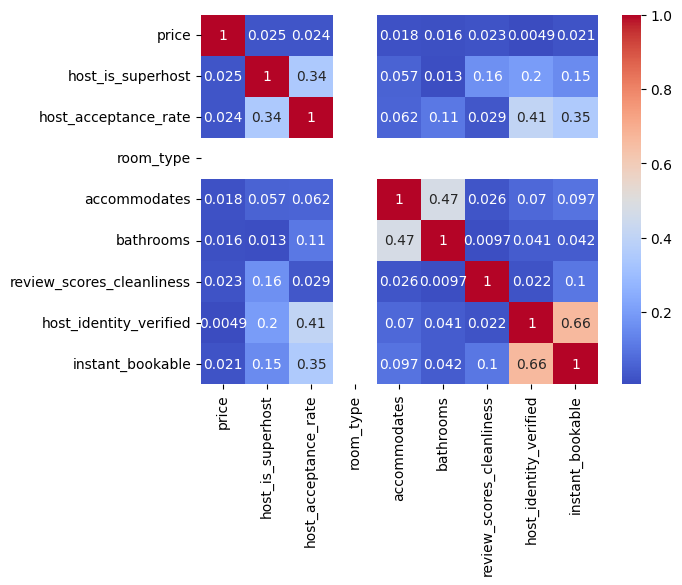

In [32]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

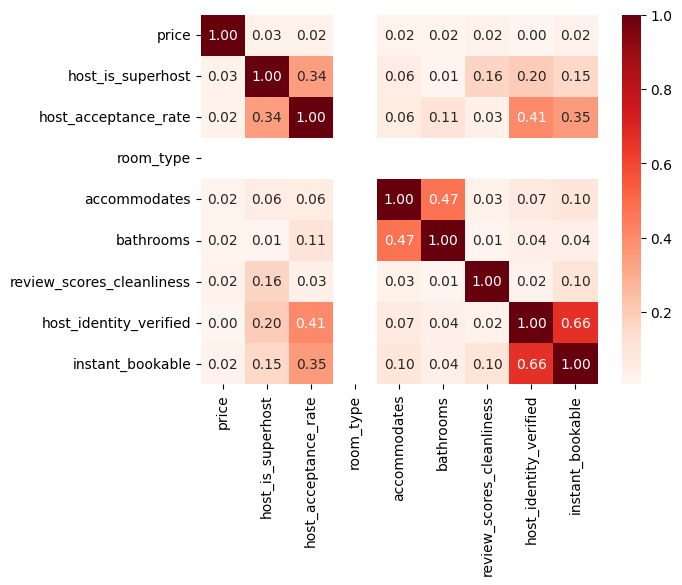

In [33]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

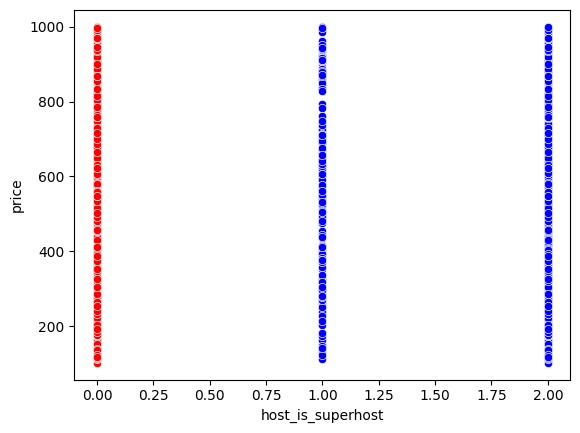

In [34]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [35]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [38]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-16.09244912]),
 'rank_': 1,
 'singular_': array([11.01256536]),
 'intercept_': np.float64(586.0987649122808)}

In [39]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0006386531682311958

In [40]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([570.00631579, 553.91386667, 553.91386667, 553.91386667,
       570.00631579, 570.00631579, 570.00631579, 553.91386667,
       553.91386667, 570.00631579, 553.91386667, 570.00631579,
       570.00631579, 570.00631579, 570.00631579, 553.91386667,
       570.00631579, 553.91386667, 553.91386667, 570.00631579,
       553.91386667, 570.00631579, 570.00631579, 553.91386667,
       553.91386667, 570.00631579, 553.91386667, 553.91386667,
       553.91386667, 553.91386667, 553.91386667, 553.91386667,
       553.91386667, 553.91386667, 553.91386667, 553.91386667,
       553.91386667, 553.91386667, 553.91386667, 570.00631579,
       553.91386667, 553.91386667, 553.91386667, 553.91386667,
       553.91386667, 553.91386667, 553.91386667, 553.91386667,
       553.91386667, 570.00631579, 553.91386667, 553.91386667,
       553.91386667, 553.91386667, 570.00631579, 553.91386667,
       553.91386667, 570.00631579, 570.00631579, 553.91386667,
       570.00631579, 553.91386667, 553.91386667, 553.91

In [41]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  room_type  \
0      570.006316  475.76                  1          1.000000e-06          4   
1      553.913867  519.40                  2          1.000000e-06          4   
2      553.913867  272.90                  2          1.000000e-06          4   
3      553.913867  134.39                  2          1.000000e-06          4   
4      570.006316  321.44                  1          3.200000e-07          4   
..            ...     ...                ...                   ...        ...   
747    553.913867  900.33                  2          1.000000e-06          4   
748    553.913867  868.64                  2          1.000000e-06          4   
749    553.913867  254.65                  2          1.000000e-06          4   
750    553.913867  456.19                  2          1.000000e-06          4   
751    553.913867  622.99                  2          1.000000e-06          4   

     accommodates  bathrooms  review_scores_cleanliness  \
0               2        1.0                       4.75   
1               6        2.5                       4.62   
2               5        1.0                       5.00   
3               2        1.0                       4.55   
4               2        0.0                       4.86   
..            ...        ...                        ...   
747             1        1.0                       4.65   
748             3        1.5                       4.12   
749             3        1.0                       4.65   
750             2        1.0                       5.00   
751             2        1.0                       4.65   

     host_identity_verified  instant_bookable  
0                         1                 1  
1                         1                 1  
2                         2                 2  
3                         2                 2  
4                         1                 1  
..                      ...               ...  
747                       1                 1  
748                       1                 1  
749                       1                 1  
750                       1                 1  
751                       1                 1  

[752 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

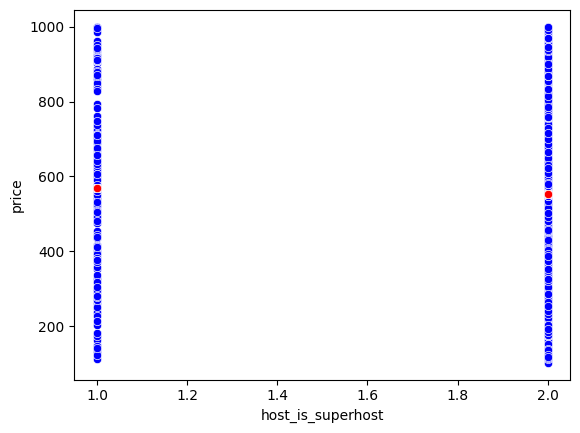

In [42]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [43]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0006386531682311958

In [44]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.025271588162028832)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

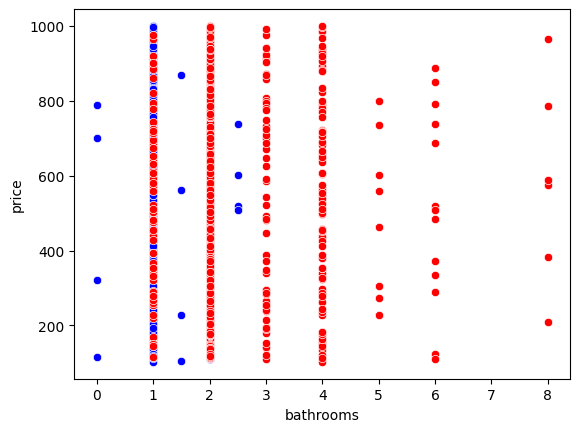

In [45]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [46]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
type(model)

sklearn.linear_model._base.LinearRegression

In [49]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [50]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([18.35584917]),
 'rank_': 1,
 'singular_': array([6.07926367]),
 'intercept_': np.float64(538.1272841105355)}

In [51]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00025321807615763525

In [52]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([556.48313328, 584.01690702, 556.48313328, 556.48313328,
       538.12728411, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 565.66105786, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 574.83898244, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 574.83898244,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48313328,
       556.48313328, 556.48313328, 556.48313328, 556.48

In [53]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0       556.483133    570.006316  475.76                  1   
1       584.016907    553.913867  519.40                  2   
2       556.483133    553.913867  272.90                  2   
3       556.483133    553.913867  134.39                  2   
4       538.127284    570.006316  321.44                  1   
..             ...           ...     ...                ...   
747     556.483133    553.913867  900.33                  2   
748     565.661058    553.913867  868.64                  2   
749     556.483133    553.913867  254.65                  2   
750     556.483133    553.913867  456.19                  2   
751     556.483133    553.913867  622.99                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0            1.000000e-06          4             2        1.0   
1            1.000000e-06          4             6        2.5   
2            1.000000e-06          4             5        1.0   
3            1.000000e-06          4             2        1.0   
4            3.200000e-07          4             2        0.0   
..                    ...        ...           ...        ...   
747          1.000000e-06          4             1        1.0   
748          1.000000e-06          4             3        1.5   
749          1.000000e-06          4             3        1.0   
750          1.000000e-06          4             2        1.0   
751          1.000000e-06          4             2        1.0   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         4.75                       1                 1  
1                         4.62                       1                 1  
2                         5.00                       2                 2  
3                         4.55                       2                 2  
4                         4.86                       1                 1  
..                         ...                     ...               ...  
747                       4.65                       1                 1  
748                       4.12                       1                 1  
749                       4.65                       1                 1  
750                       5.00                       1                 1  
751                       4.65                       1                 1  

[752 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

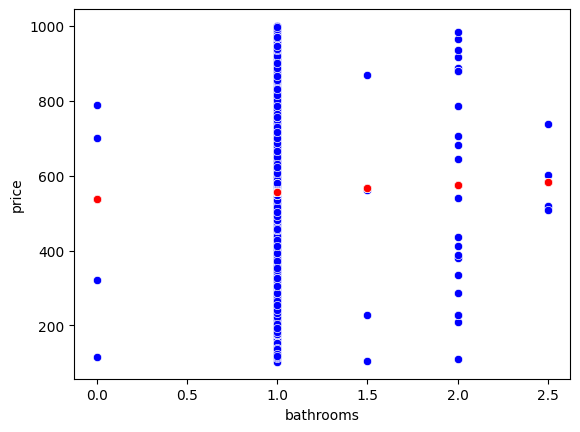

In [54]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [55]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00025321807615763525

In [56]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.01591282740928322)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

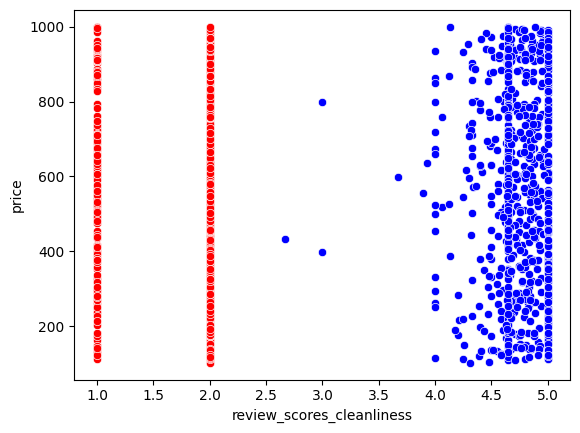

In [57]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

In [58]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [60]:
type(model)

sklearn.linear_model._base.LinearRegression

In [61]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [62]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-19.44074199]),
 'rank_': 1,
 'singular_': array([8.42223052]),
 'intercept_': np.float64(648.690351697374)}

In [63]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0005451596509951084

In [64]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([556.34682722, 558.87412368, 551.48664172, 560.23497562,
       554.2083456 , 554.01393818, 554.40275302, 553.43071592,
       553.81953076, 553.81953076, 561.59582756, 552.65308624,
       552.2642714 , 554.59716044, 554.40275302, 552.45867882,
       557.1244569 , 554.79156786, 553.81953076, 555.95801238,
       553.04190108, 552.84749366, 559.26293852, 558.096494  ,
       554.01393818, 553.04190108, 557.70767916, 554.98597528,
       554.79156786, 561.20701272, 554.98597528, 556.34682722,
       556.1524198 , 560.23497562, 555.56919754, 551.48664172,
       558.67971626, 562.56786466, 554.2083456 , 555.1803827 ,
       556.93004948, 554.79156786, 559.65175336, 558.87412368,
       559.65175336, 559.45734594, 559.45734594, 561.20701272,
       556.73564206, 554.01393818, 560.81819788, 555.1803827 ,
       554.59716044, 557.1244569 , 553.81953076, 555.95801238,
       558.29090142, 555.56919754, 554.01393818, 557.1244569 ,
       554.59716044, 560.0405682 , 555.1803827 , 557.31

In [65]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0       556.346827     556.483133    570.006316  475.76                  1   
1       558.874124     584.016907    553.913867  519.40                  2   
2       551.486642     556.483133    553.913867  272.90                  2   
3       560.234976     556.483133    553.913867  134.39                  2   
4       554.208346     538.127284    570.006316  321.44                  1   
..             ...            ...           ...     ...                ...   
747     558.290901     556.483133    553.913867  900.33                  2   
748     568.594495     565.661058    553.913867  868.64                  2   
749     558.290901     556.483133    553.913867  254.65                  2   
750     551.486642     556.483133    553.913867  456.19                  2   
751     558.290901     556.483133    553.913867  622.99                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0            1.000000e-06          4             2        1.0   
1            1.000000e-06          4             6        2.5   
2            1.000000e-06          4             5        1.0   
3            1.000000e-06          4             2        1.0   
4            3.200000e-07          4             2        0.0   
..                    ...        ...           ...        ...   
747          1.000000e-06          4             1        1.0   
748          1.000000e-06          4             3        1.5   
749          1.000000e-06          4             3        1.0   
750          1.000000e-06          4             2        1.0   
751          1.000000e-06          4             2        1.0   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         4.75                       1                 1  
1                         4.62                       1                 1  
2                         5.00                       2                 2  
3                         4.55                       2                 2  
4                         4.86                       1                 1  
..                         ...                     ...               ...  
747                       4.65                       1                 1  
748                       4.12                       1                 1  
749                       4.65                       1                 1  
750                       5.00                       1                 1  
751                       4.65                       1                 1  

[752 rows x 12 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

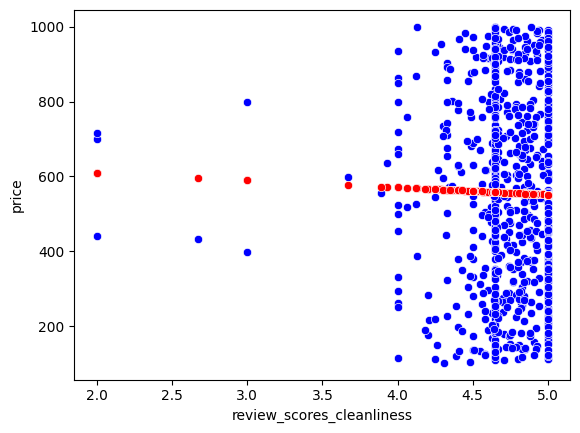

In [66]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

In [67]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0005451596509951084

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.023348654158111735)

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

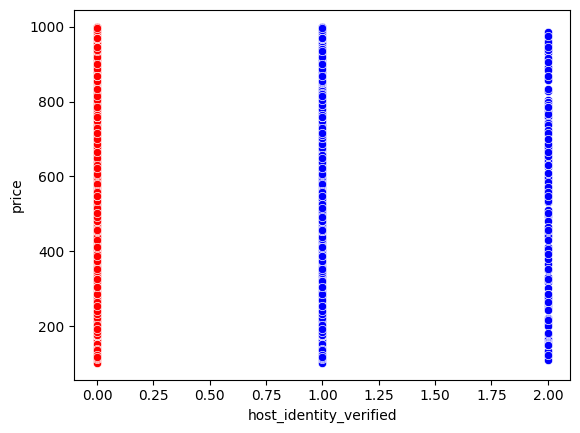

In [69]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [70]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
type(model)

sklearn.linear_model._base.LinearRegression

In [73]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [74]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.21306372]),
 'rank_': 1,
 'singular_': array([10.64458458]),
 'intercept_': np.float64(553.3596279648386)}

In [75]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

2.3787012094711457e-05

In [76]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([556.57269168, 556.57269168, 559.7857554 , 559.7857554 ,
       556.57269168, 556.57269168, 556.57269168, 559.7857554 ,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       559.7857554 , 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 559.7857554 ,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 559.7857554 , 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 556.57269168, 556.57269168, 556.57269168,
       556.57269168, 559.7857554 , 556.57269168, 556.57

In [77]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0       556.572692     556.346827     556.483133    570.006316  475.76   
1       556.572692     558.874124     584.016907    553.913867  519.40   
2       559.785755     551.486642     556.483133    553.913867  272.90   
3       559.785755     560.234976     556.483133    553.913867  134.39   
4       556.572692     554.208346     538.127284    570.006316  321.44   
..             ...            ...            ...           ...     ...   
747     556.572692     558.290901     556.483133    553.913867  900.33   
748     556.572692     568.594495     565.661058    553.913867  868.64   
749     556.572692     558.290901     556.483133    553.913867  254.65   
750     556.572692     551.486642     556.483133    553.913867  456.19   
751     556.572692     558.290901     556.483133    553.913867  622.99   

     host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                    1          1.000000e-06          4             2   
1                    2          1.000000e-06          4             6   
2                    2          1.000000e-06          4             5   
3                    2          1.000000e-06          4             2   
4                    1          3.200000e-07          4             2   
..                 ...                   ...        ...           ...   
747                  2          1.000000e-06          4             1   
748                  2          1.000000e-06          4             3   
749                  2          1.000000e-06          4             3   
750                  2          1.000000e-06          4             2   
751                  2          1.000000e-06          4             2   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0          1.0                       4.75                       1   
1          2.5                       4.62                       1   
2          1.0                       5.00                       2   
3          1.0                       4.55                       2   
4          0.0                       4.86                       1   
..         ...                        ...                     ...   
747        1.0                       4.65                       1   
748        1.5                       4.12                       1   
749        1.0                       4.65                       1   
750        1.0                       5.00                       1   
751        1.0                       4.65                       1   

     instant_bookable  
0                   1  
1                   1  
2                   2  
3                   2  
4                   1  
..                ...  
747                 1  
748                 1  
749                 1  
750                 1  
751                 1  

[752 rows x 13 columns]

<Axes: xlabel='host_identity_verified', ylabel='price'>

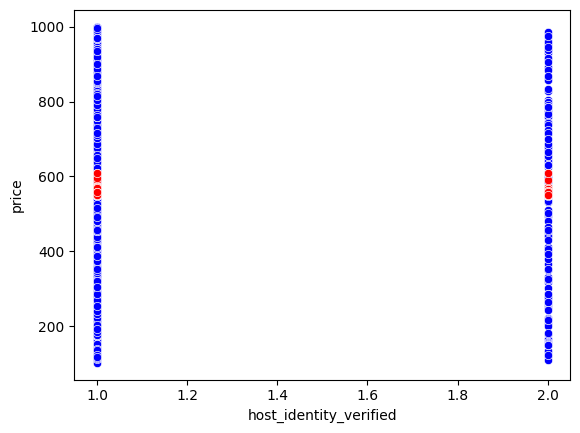

In [78]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

In [79]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

2.3787012094711457e-05

In [80]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.004877193054894532)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

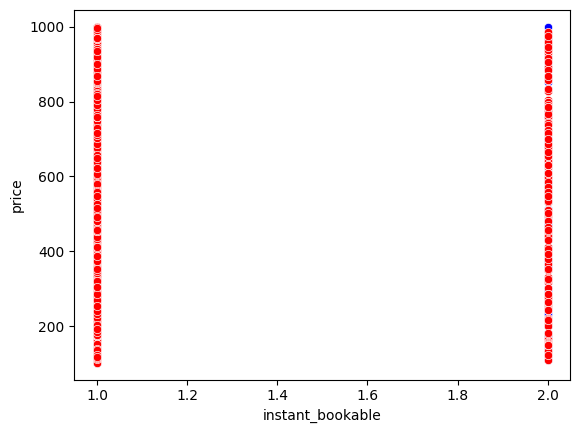

In [81]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [82]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [84]:
type(model)

sklearn.linear_model._base.LinearRegression

In [85]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [86]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-12.96234582]),
 'rank_': 1,
 'singular_': array([11.17153488]),
 'intercept_': np.float64(572.8524131611474)}

In [87]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0004264191327874034

In [88]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([559.89006734, 559.89006734, 546.92772152, 546.92772152,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       546.92772152, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       546.92772152, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 546.92772152, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 546.92772152,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 559.89006734, 559.89006734, 559.89006734,
       559.89006734, 546.92772152, 559.89006734, 559.89

In [89]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  Predicciones  \
0       559.890067     556.572692     556.346827     556.483133    570.006316   
1       559.890067     556.572692     558.874124     584.016907    553.913867   
2       546.927722     559.785755     551.486642     556.483133    553.913867   
3       546.927722     559.785755     560.234976     556.483133    553.913867   
4       559.890067     556.572692     554.208346     538.127284    570.006316   
..             ...            ...            ...            ...           ...   
747     559.890067     556.572692     558.290901     556.483133    553.913867   
748     559.890067     556.572692     568.594495     565.661058    553.913867   
749     559.890067     556.572692     558.290901     556.483133    553.913867   
750     559.890067     556.572692     551.486642     556.483133    553.913867   
751     559.890067     556.572692     558.290901     556.483133    553.913867   

      price  host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0    475.76                  1          1.000000e-06          4             2   
1    519.40                  2          1.000000e-06          4             6   
2    272.90                  2          1.000000e-06          4             5   
3    134.39                  2          1.000000e-06          4             2   
4    321.44                  1          3.200000e-07          4             2   
..      ...                ...                   ...        ...           ...   
747  900.33                  2          1.000000e-06          4             1   
748  868.64                  2          1.000000e-06          4             3   
749  254.65                  2          1.000000e-06          4             3   
750  456.19                  2          1.000000e-06          4             2   
751  622.99                  2          1.000000e-06          4             2   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0          1.0                       4.75                       1   
1          2.5                       4.62                       1   
2          1.0                       5.00                       2   
3          1.0                       4.55                       2   
4          0.0                       4.86                       1   
..         ...                        ...                     ...   
747        1.0                       4.65                       1   
748        1.5                       4.12                       1   
749        1.0                       4.65                       1   
750        1.0                       5.00                       1   
751        1.0                       4.65                       1   

     instant_bookable  
0                   1  
1                   1  
2                   2  
3                   2  
4                   1  
..                ...  
747                 1  
748                 1  
749                 1  
750                 1  
751                 1  

[752 rows x 14 columns]

<Axes: xlabel='instant_bookable', ylabel='price'>

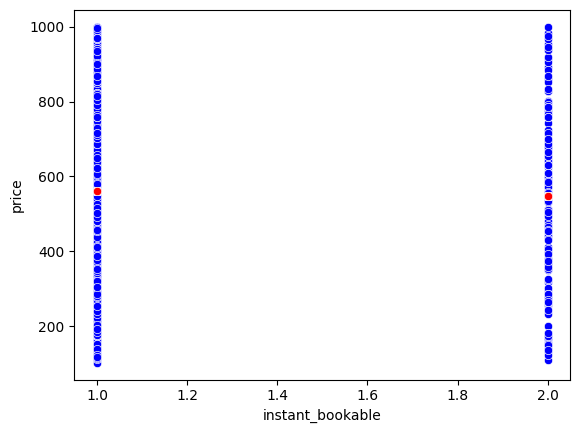

In [90]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [91]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0004264191327874034

In [92]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.020649918469267704)

Price

In [93]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='host_listings_count', ylabel='price'>

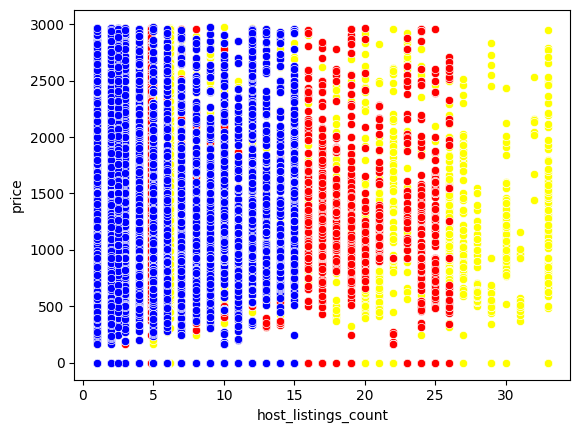

In [94]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "price"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_listings_count',y='price',color='yellow',data=df)
sns.scatterplot(x='calculated_host_listings_count',y='price',color='red',data=df)
sns.scatterplot(x='calculated_host_listings_count_entire_homes',y='price',color='blue',data=df)

In [95]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [96]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [97]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes']]
Var_Dep = df['price']

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [99]:
type(model)

sklearn.linear_model._base.LinearRegression

In [100]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [101]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.51761357, 7.65477042, 9.52625939]),
 'rank_': 3,
 'singular_': array([1098.33405527,  413.72299591,  321.51193718]),
 'intercept_': np.float64(1053.7114599445242)}

In [102]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.013015160465698838

In [103]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']])
y_pred

array([1072.41010333, 1171.26602378, 1092.62636029, ..., 1072.41010333,
       1197.77320532, 1128.50603349], shape=(17363,))

In [105]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred)
df

Predicciones6  Predicciones4  Predicciones  Unnamed: 0.1  \
0        1072.410103    1072.410103  1.302494e+08             0   
1        1171.266024    1171.266024  1.302494e+08             1   
2        1092.626360    1092.626360  1.302494e+08             2   
3        1100.281131    1100.281131  1.302494e+08             3   
4        1112.842617    1112.842617  1.302494e+08             4   
...              ...            ...           ...           ...   
17358    1072.410103    1072.410103  3.158846e+08         26572   
17359    1072.410103    1072.410103  3.158869e+08         26573   
17360    1072.410103    1072.410103  3.159058e+08         26574   
17361    1197.773205    1197.773205  3.159104e+08         26575   
17362    1128.506033    1128.506033  3.159739e+08         26581   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    0.00                  0.00                  2   
1                    1.00                  0.93                  1   
2                    0.71                  0.57                  1   
3                    1.00                  1.00                  1   
4                    1.00                  1.00                  1   
...                   ...                   ...                ...   
17358                0.00                  0.00                  2   
17359                0.00                  0.00                  2   
17360                0.00                  0.00                  2   
17361                1.00                  1.00                  1   
17362                1.00                  1.00                  1   

       host_identity_verified  room_type  has_availability  ...  \
0                           1          1                 1  ...   
1                           1          1                 1  ...   
2                           1          1                 1  ...   
3                           1          1                 1  ...   
4                           1          1                 1  ...   
...                       ...        ...               ...  ...   
17358                       1          1                 1  ...   
17359                       1          1                 1  ...   
17360                       1          1                 2  ...   
17361                       1          1                 1  ...   
17362                       1          1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0                        4.85        

<Axes: xlabel='host_listings_count', ylabel='price'>

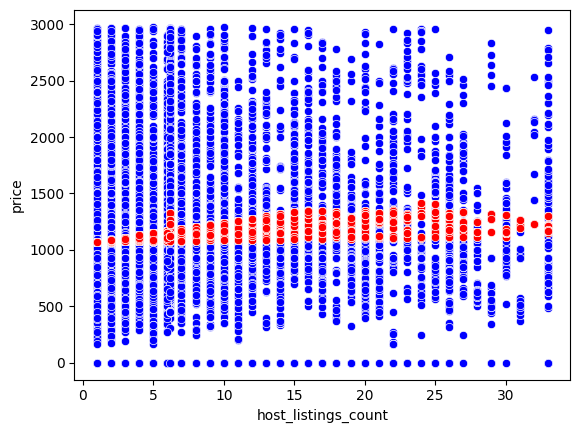

In [108]:
#Visualizamos la gráfica comparativa entre el total real y el total predechost_listings_count

sns.scatterplot(x='host_listings_count', y='price', color="blue", data=df)
sns.scatterplot(x='host_listings_count', y='Predicciones6' ,color='red',data=df)

In [109]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.013015160465698838

In [110]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.11408400617833701)

In [111]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones6  Predicciones4  \
Predicciones6                                      1.000000       1.000000   
Predicciones4                                      1.000000       1.000000   
Predicciones                                       0.064764       0.064764   
Unnamed: 0.1                                       0.071108       0.071108   
host_response_rate                                 0.245888       0.245888   
host_acceptance_rate                               0.242847       0.242847   
host_is_superhost                                 -0.091685      -0.091685   
host_identity_verified                            -0.034819      -0.034819   
room_type                                               NaN            NaN   
has_availability                                  -0.098617      -0.098617   
instant_bookable                                  -0.259757      -0.259757   
id                                                 0.064764       0.064764   
host_id                                            0.055113       0.055113   
host_listings_count                                0.785359       0.785359   
host_total_listings_count                          0.725488       0.725488   
accommodates                                      -0.055400      -0.055400   
bathrooms                                         -0.025980      -0.025980   
bedrooms                                          -0.090168      -0.090168   
beds                                              -0.093936      -0.093936   
price                                              0.114084       0.114084   
minimum_nights                                    -0.166130      -0.166130   
maximum_nights                                     0.008498       0.008498   
availability_30                                    0.081367       0.081367   
availability_60                                    0.105912       0.105912   
availability_90                                    0.043259       0.043259   
availability_365                                   0.129466       0.129466   
number_of_reviews                                  0.043662       0.043662   
number_of_reviews_ltm                              0.083642       0.083642   
number_of_reviews_l30d                             0.042519       0.042519   
review_scores_accuracy                            -0.082695      -0.082695   
review_scores_cleanliness                         -0.033180      -0.033180   
review_scores_checkin                             -0.041170      -0.041170   
review_scores_communication                       -0.069985      -0.069985   
review_scores_location                             0.003091       0.003091   
calculated_host_listings_count                     0.924678       0.924678   
calculated_host_listings_count_entire_homes        0.849273       0.849273   
calculated_host_listings_count_private_rooms       0.200374       0.200374   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.071924       0.071924   

                                              Predicciones  Unnamed: 0.1  \
Predicciones6                                     0.064764      0.071108   
Predicciones4                                     0.064764      0.071108   
Predicciones                                      1.000000      0.945858   
Unnamed: 0.1                                      0.945858      1.000000   
host_response_rate                                0.133829      0.131233   
host_acceptance_rate                              0.136854      0.137664   
host_is_superhost                                -0.001483      0.014700   
host_identity_verified                           -0.067601     -0.066643   
room_type                                              NaN           NaN   
has_availability                                 -0.044346     -0.042985   
instant_bookable                                 -0.199933     -0.213561   
id           

In [112]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones4  \
Predicciones6                                      1.000000       1.000000   
Predicciones4                                      1.000000       1.000000   
Predicciones                                       0.064764       0.064764   
Unnamed: 0.1                                       0.071108       0.071108   
host_response_rate                                 0.245888       0.245888   
host_acceptance_rate                               0.242847       0.242847   
host_is_superhost                                  0.091685       0.091685   
host_identity_verified                             0.034819       0.034819   
room_type                                               NaN            NaN   
has_availability                                   0.098617       0.098617   
instant_bookable                                   0.259757       0.259757   
id                                                 0.064764       0.064764   
host_id                                            0.055113       0.055113   
host_listings_count                                0.785359       0.785359   
host_total_listings_count                          0.725488       0.725488   
accommodates                                       0.055400       0.055400   
bathrooms                                          0.025980       0.025980   
bedrooms                                           0.090168       0.090168   
beds                                               0.093936       0.093936   
price                                              0.114084       0.114084   
minimum_nights                                     0.166130       0.166130   
maximum_nights                                     0.008498       0.008498   
availability_30                                    0.081367       0.081367   
availability_60                                    0.105912       0.105912   
availability_90                                    0.043259       0.043259   
availability_365                                   0.129466       0.129466   
number_of_reviews                                  0.043662       0.043662   
number_of_reviews_ltm                              0.083642       0.083642   
number_of_reviews_l30d                             0.042519       0.042519   
review_scores_accuracy                             0.082695       0.082695   
review_scores_cleanliness                          0.033180       0.033180   
review_scores_checkin                              0.041170       0.041170   
review_scores_communication                        0.069985       0.069985   
review_scores_location                             0.003091       0.003091   
calculated_host_listings_count                     0.924678       0.924678   
calculated_host_listings_count_entire_homes        0.849273       0.849273   
calculated_host_listings_count_private_rooms       0.200374       0.200374   
calculated_host_listings_count_shared_rooms             NaN            NaN   
reviews_per_month                                  0.071924       0.071924   

                                              Predicciones  Unnamed: 0.1  \
Predicciones6                                     0.064764      0.071108   
Predicciones4                                     0.064764      0.071108   
Predicciones                                      1.000000      0.945858   
Unnamed: 0.1                                      0.945858      1.000000   
host_response_rate                                0.133829      0.131233   
host_acceptance_rate                              0.136854      0.137664   
host_is_superhost                                 0.001483      0.014700   
host_identity_verified                            0.067601      0.066643   
room_type                                              NaN           NaN   
has_availability                                  0.044346      0.042985   
instant_bookable                                  0.199933      0.213561   
id           

In [113]:
Corr_Factors1= Corr_Factors1['price'].sort_values(ascending=False)
Corr_Factors1

price                                           1.000000
bathrooms                                       0.388683
availability_365                                0.253547
availability_60                                 0.213003
host_response_rate                              0.208488
bedrooms                                        0.204184
host_acceptance_rate                            0.203903
availability_30                                 0.198505
accommodates                                    0.194701
has_availability                                0.172929
host_identity_verified                          0.154529
instant_bookable                                0.143512
host_is_superhost                               0.124232
Predicciones4                                   0.114084
Predicciones6                                   0.114084
calculated_host_listings_count                  0.105491
id                                              0.104098
Predicciones                   